In [ ]:
pip install numpy pandas matplotlib tensorflow scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
data=pd.read_csv('/content/ec_data.csv')
data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013257,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [ ]:
data.isnull().sum()

,0
temperature,0
humidity,0
wind_speed,0
solar_irradiance,0
energy_consumption,0


In [ ]:
x=data[['temperature','humidity','wind_speed','solar_irradiance']].values
y=data['energy_consumption'].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
model1 = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),  # Input layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(1)  # Output layer for regression (1 neuron)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [ ]:
history=model1.fit(x_train,y_train,epochs=50,batch_size=16,validation_split=0.2,verbose=1)
#epoch-no. of time data will be trained,btach_size -->no. of sample

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 89988.6250 - mae: 270.4374 - val_loss: 83394.2969 - val_mae: 258.4348
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 91113.7734 - mae: 275.0876 - val_loss: 81631.7812 - val_mae: 254.9935
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 87512.8594 - mae: 266.8163 - val_loss: 77499.3906 - val_mae: 246.7236
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 81977.3438 - mae: 256.0954 - val_loss: 69866.0000 - val_mae: 230.6317
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 74693.2422 - mae: 239.2885 - val_loss: 58223.4180 - val_mae: 204.1840
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 54325.6719 - mae: 194.4151 - val_loss: 44415.9688 - val_mae: 171.4878
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 47649.2617 - mae: 179.8134 - val_loss: 31403.0527 - val_mae: 141.3350
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29383.7090 - mae: 138.5687 - val_loss: 22801.3

In [ ]:
test_loss, test_mae = model1.evaluate(x_test, y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17328.4102 - mae: 113.2013  
Test Mean Absolute Error: 112.68


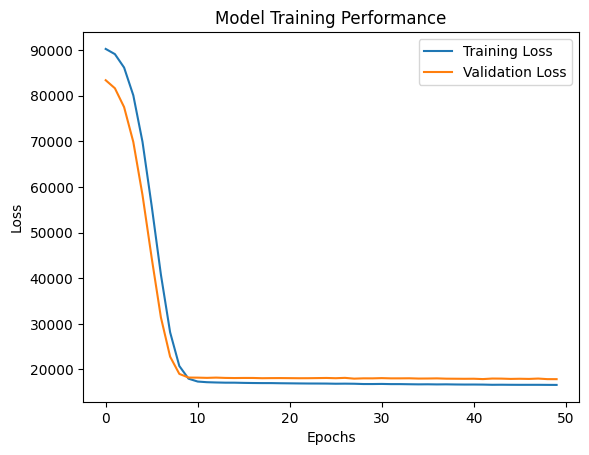

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [ ]:
predictions = model1.predict(x_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[280.67776],
       [252.29265],
       [258.16736],
       [228.78711],
       [335.6343 ],
       [302.9615 ],
       [314.91873],
       [282.30957],
       [290.0182 ],
       [278.29257],
       [245.85439],
       [268.46545],
       [280.3679 ],
       [238.3685 ],
       [289.44043],
       [312.5278 ],
       [265.62686],
       [304.4703 ],
       [297.27707],
       [242.53961],
       [271.76846],
       [286.92575],
       [269.61514],
       [274.1879 ],
       [257.02966],
       [253.7669 ],
       [255.57523],
       [311.41595],
       [311.76065],
       [259.69067],
       [246.35481],
       [302.6992 ],
       [286.7937 ],
       [267.769  ],
       [315.134  ],
       [291.3795 ],
       [232.26726],
       [258.2247 ],
       [273.92227],
       [239.94427],
       [254.36276],
       [253.01529],
       [246.59476],
       [260.19043],
       [264.12897],
       [257.99905],
       [265.94293],
       [255.76501],
       [292.54092],
       [292.6394 ],


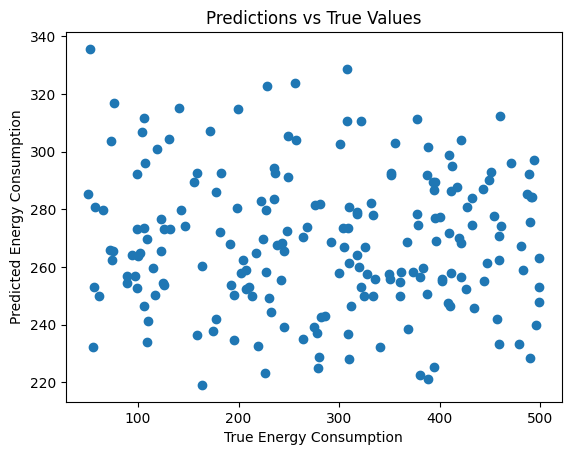

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Predictions vs True Values')
plt.show()

In [ ]:
#HYPO PARAMETER TURING
#increase no. of layers
# no. of neurons
#change optimizer
#batch__size
#no. of epochs
#test-train validation data %
#lessen mae  no of ephocs increases then loss decreases

In [ ]:
model2 = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),  # Input layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(1)  # Output layer for regression (1 neuron)
])

In [ ]:
model2.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [ ]:
history=model2.fit(x_train,y_train,epochs=20,batch_size=8,validation_split=0.1,verbose=1)

Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan -

In [ ]:
test_loss, test_mae = model2.evaluate(x_test, y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan  
Test Mean Absolute Error: nan


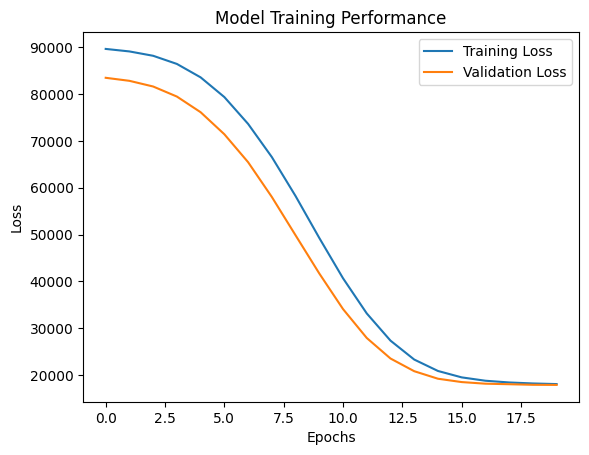

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [ ]:
predictions2 = model2.predict(x_test)
predictions2

In [ ]:
plt.scatter(y_test, predictions2)
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Predictions vs True Values')
plt.show()